In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval

In [2]:
data = pd.read_csv("data.csv")

In [3]:
null_stats = pd.DataFrame({
    'non_null_count': data.count(),
    'null_count': data.isna().sum(),
    'dtype': data.dtypes
})
print(null_stats)

                   non_null_count  null_count    dtype
abilities                     801           0   object
against_bug                   801           0  float64
against_dark                  801           0  float64
against_dragon                801           0  float64
against_electric              801           0  float64
against_fairy                 801           0  float64
against_fight                 801           0  float64
against_fire                  801           0  float64
against_flying                801           0  float64
against_ghost                 801           0  float64
against_grass                 801           0  float64
against_ground                801           0  float64
against_ice                   801           0  float64
against_normal                801           0  float64
against_poison                801           0  float64
against_psychic               801           0  float64
against_rock                  801           0  float64
against_st

In [3]:
def cat(df, spec):
    table = df.pivot_table(index=spec, columns='is_legendary', aggfunc='size', fill_value=0)

    cat = table.index
    status = table.columns
    n_cat = len(cat)
    width = 1
    space_between = 3
    x = np.arange(0, n_cat * space_between, space_between)

    fig, ax = plt.subplots(figsize=(10, 6))
    for i, stat in enumerate(status):
        ax.bar(x + i * width, table[stat], width, alpha=0.5, label=stat, color=['green' if stat == 1 else 'red'])

    ax.set_title('Легендарность покемона', pad=20, fontsize=14)
    ax.set_xlabel(spec, fontsize=12)
    ax.set_ylabel('Количество покемонов', fontsize=12)
    ax.set_xticks(x + width/2)
    ax.set_xticklabels(cat, fontsize=12, rotation=90)
    ax.legend(title='Статус', fontsize=11)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Добавление подписей значений
    for i, stat in enumerate(status):
        for j, value in enumerate(table[stat]):
            ax.text(x[j] + i*width, value + 0.5, str(value), 
                    ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()

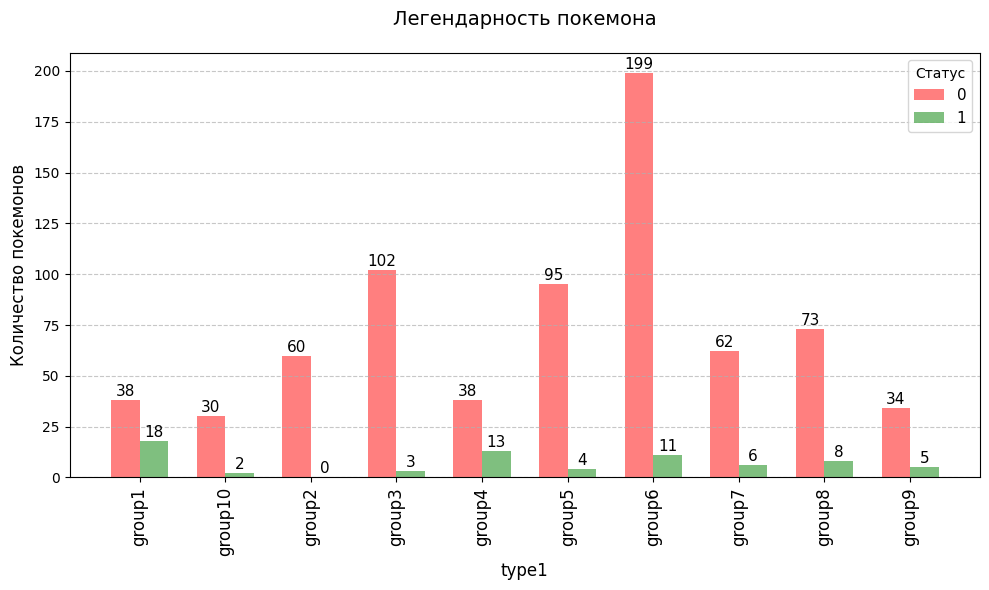

In [45]:
data['type1'] = data['type1'].replace(['psychic', 'flying'], 'group1')
data['type1'] = data['type1'].replace(['fighting', 'poison'], 'group2')
data['type1'] = data['type1'].replace(['normal'], 'group3')
data['type1'] = data['type1'].replace(['dragon', 'steel'], 'group4')
data['type1'] = data['type1'].replace(['bug', 'ghost'], 'group5')
data['type1'] = data['type1'].replace(['fairy', 'grass', 'water'], 'group6')
data['type1'] = data['type1'].replace(['ice', 'rock'], 'group7')
data['type1'] = data['type1'].replace(['dark', 'fire'], 'group8')
data['type1'] = data['type1'].replace(['electric'], 'group9')
data['type1'] = data['type1'].replace(['ground'], 'group10')

cat(data, 'type1')

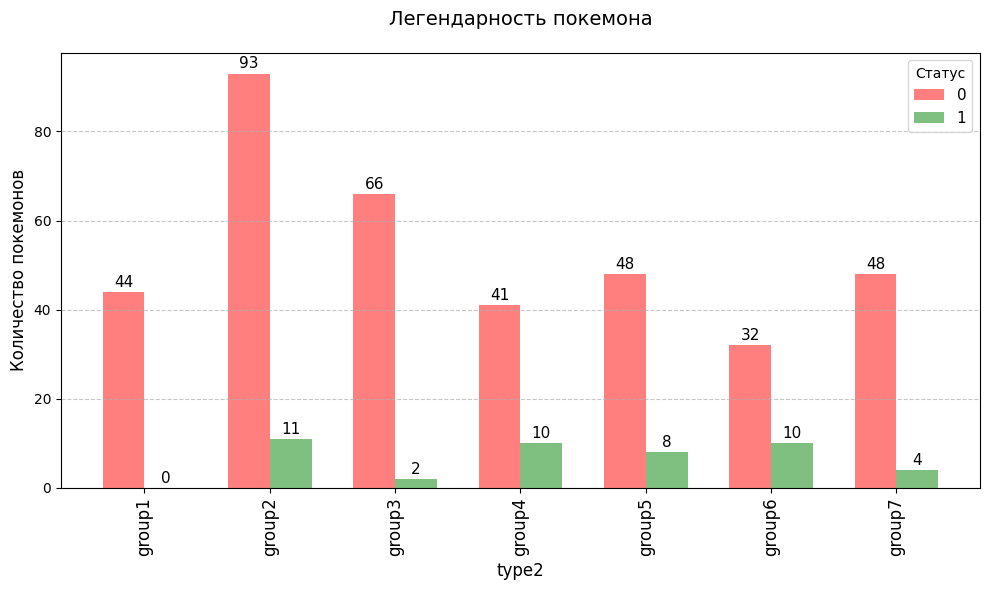

In [4]:
data['type2'] = data['type2'].replace(['bug', 'dark', 'normal', 'rock'], 'group1')
data['type2'] = data['type2'].replace(['electric', 'flying'], 'group2')
data['type2'] = data['type2'].replace(['ground', 'poison'], 'group3')
data['type2'] = data['type2'].replace(['fairy', 'steel'], 'group4')
data['type2'] = data['type2'].replace(['ghost', 'fire', 'psychic'], 'group5')
data['type2'] = data['type2'].replace(['dragon', 'fighting'], 'group6')
data['type2'] = data['type2'].replace(['ice', 'water', 'grass'], 'group7')

cat(data, 'type2')

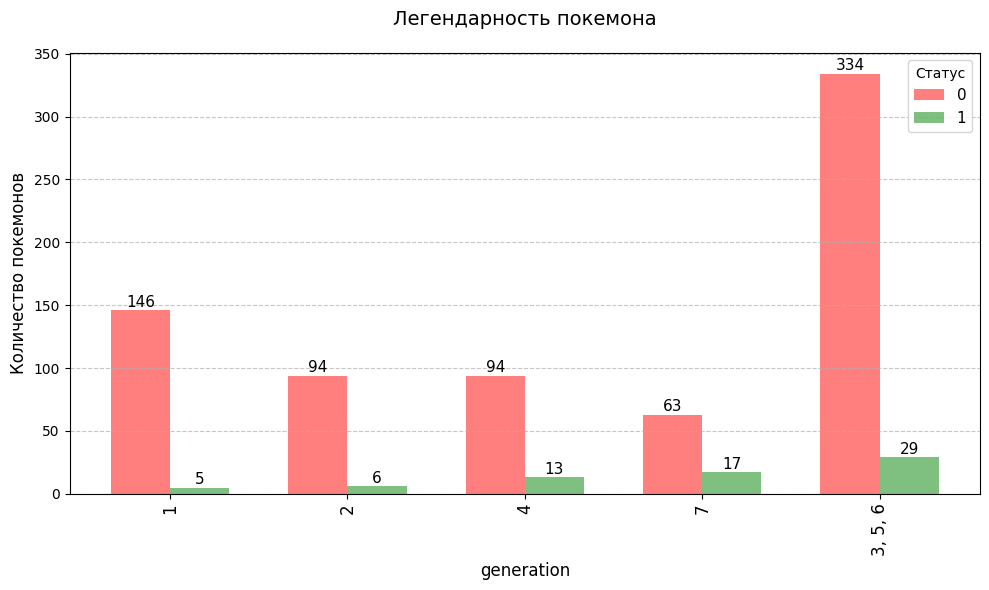

In [46]:
data['generation'] = data['generation'].replace([3, 5, 6], '3, 5, 6')
cat(data, 'generation')

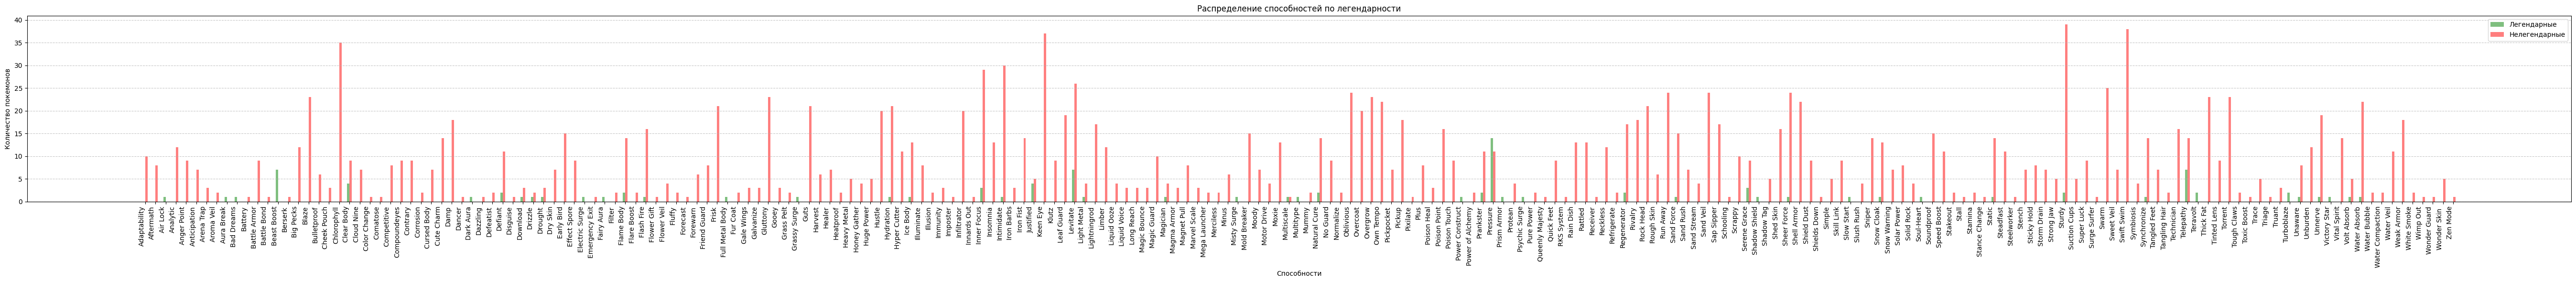

In [3]:
data['abilities'] = data['abilities'].apply(literal_eval)

legend_kol = {}
no_legend_kol = {}

for i, row in data.iterrows():
    for ability in row['abilities']:
        if row['is_legendary'] == 1:
            legend_kol[ability] = legend_kol.get(ability, 0) + 1
        else:
            no_legend_kol[ability] = no_legend_kol.get(ability, 0) + 1

abilities = sorted(set(legend_kol.keys()).union(set(no_legend_kol.keys())))

legend = [legend_kol.get(ability, 0) for ability in abilities]
no_legend = [no_legend_kol.get(ability, 0) for ability in abilities]

plt.figure(figsize=(54, 6))
bar_width = 0.35
group_spacing = 1.5
x = np.arange(len(abilities)) * group_spacing

plt.bar(x - bar_width/2, legend, width=bar_width, alpha=0.5, color='green', label='Легендарные')
plt.bar(x + bar_width/2, no_legend, width=bar_width, alpha=0.5, color='red', label='Нелегендарные')

plt.xticks(x, abilities, rotation=90, ha='right')
plt.xlabel('Способности')
plt.ylabel('Количество покемонов')
plt.title('Распределение способностей по легендарности')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
def number(df, safe, no_safe, column):
    plt.figure(figsize=(30, 6))
    sns.countplot(data=safe, x=column, color='green', alpha=0.5, label="Легендарный")
    sns.countplot(data=no_safe, x=column, color='red', alpha=0.5, label="Нелегендарный")
    plt.xlabel(f"Характеристика {column} сайтов")
    plt.ylabel("Количество")
    plt.title(f"Сравнение распределения {column} легендарных и нелегендарных покемонов")
    plt.legend()
    plt.show()

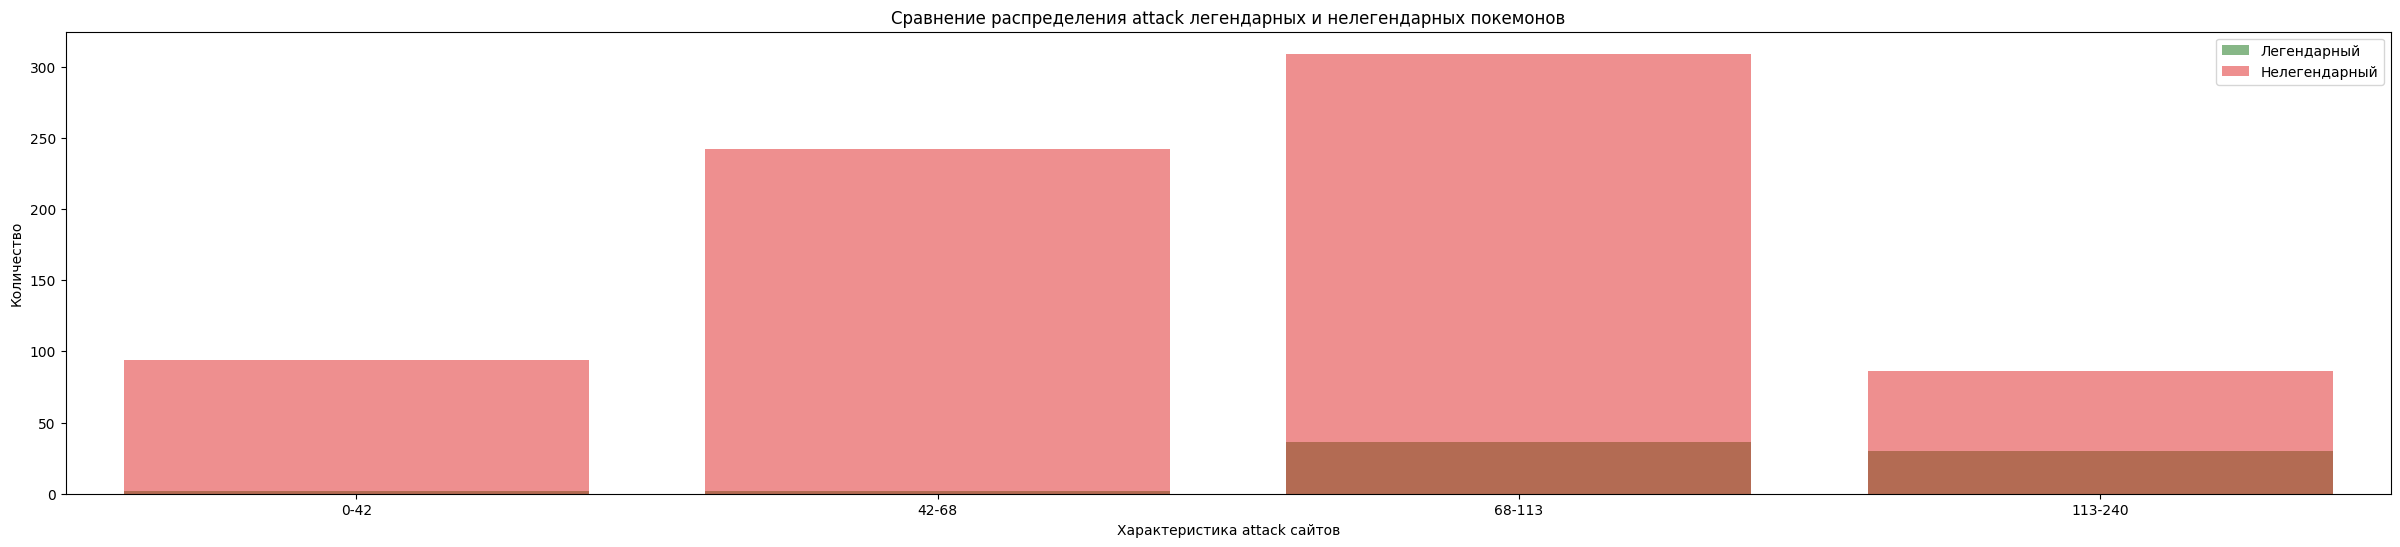

In [24]:
data['attack'] = pd.cut(data['attack'], bins=[0, 42, 68, 113, 260], labels=['0-42', '42-68', '68-113', '113-240'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'attack')

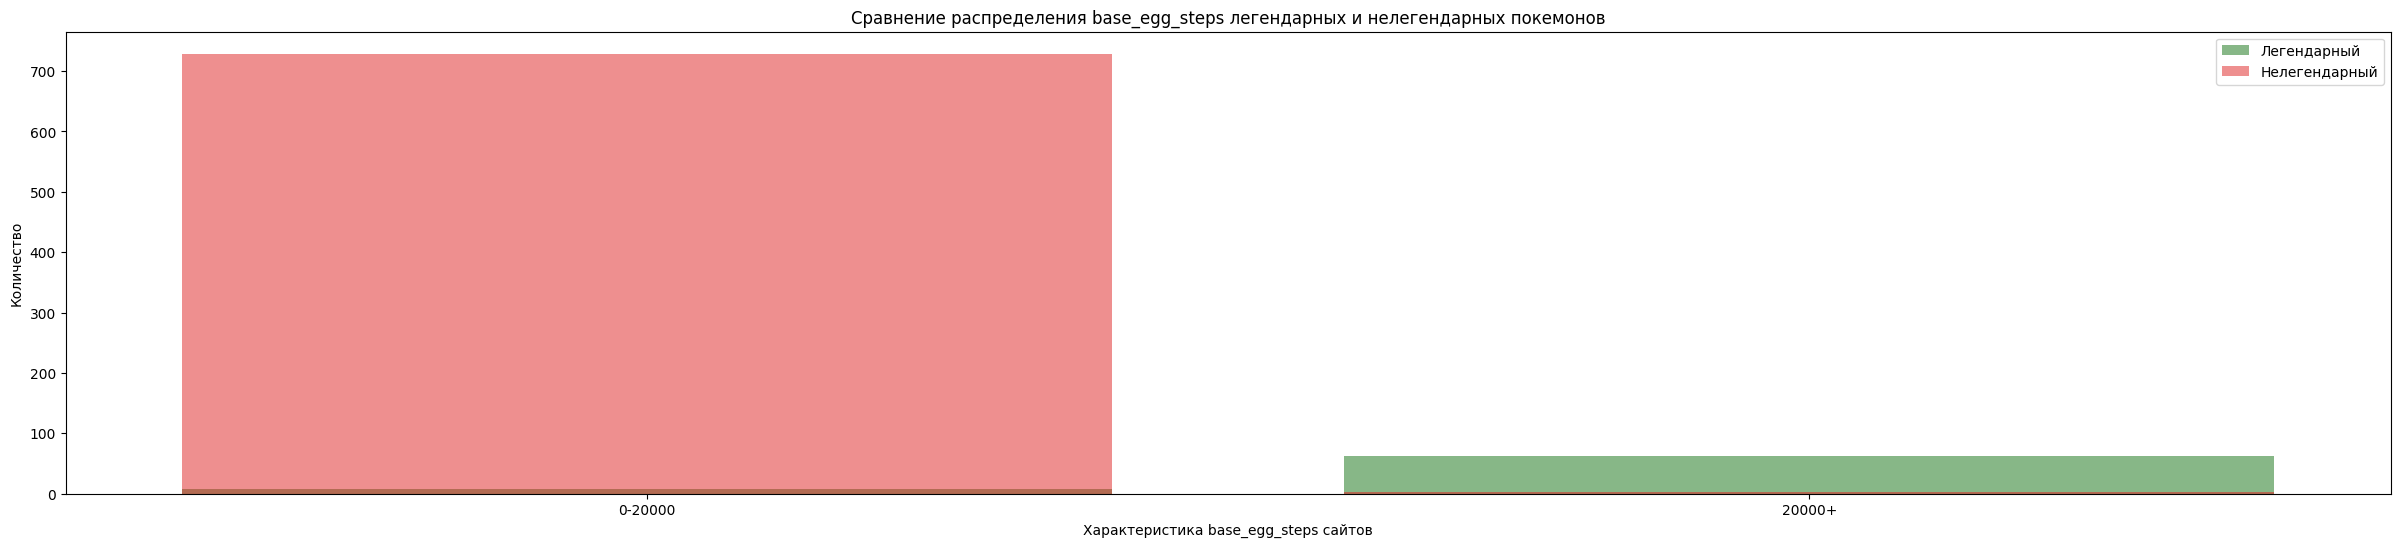

In [25]:
bins = [0, 20000, 35000]
data['base_egg_steps'] = pd.cut(data['base_egg_steps'], bins=bins, labels=['0-20000', '20000+'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'base_egg_steps')

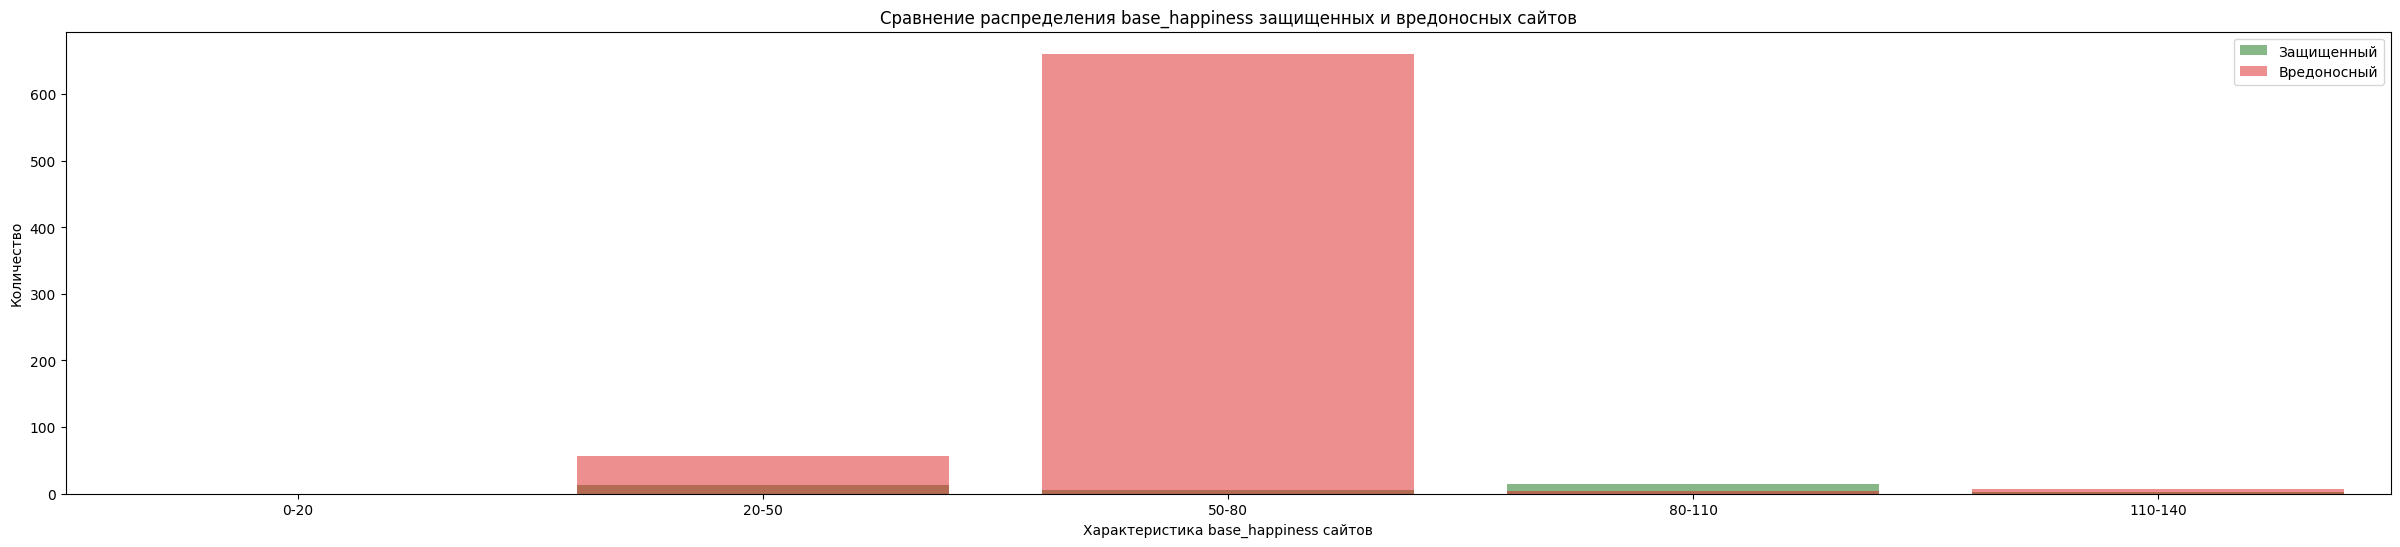

In [20]:
data['base_happiness'] = pd.cut(data['base_happiness'], bins=[0, 20, 50, 80, 110, 140], labels=['0-20', '20-50', '50-80', '80-110', '110-140'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'base_happiness')

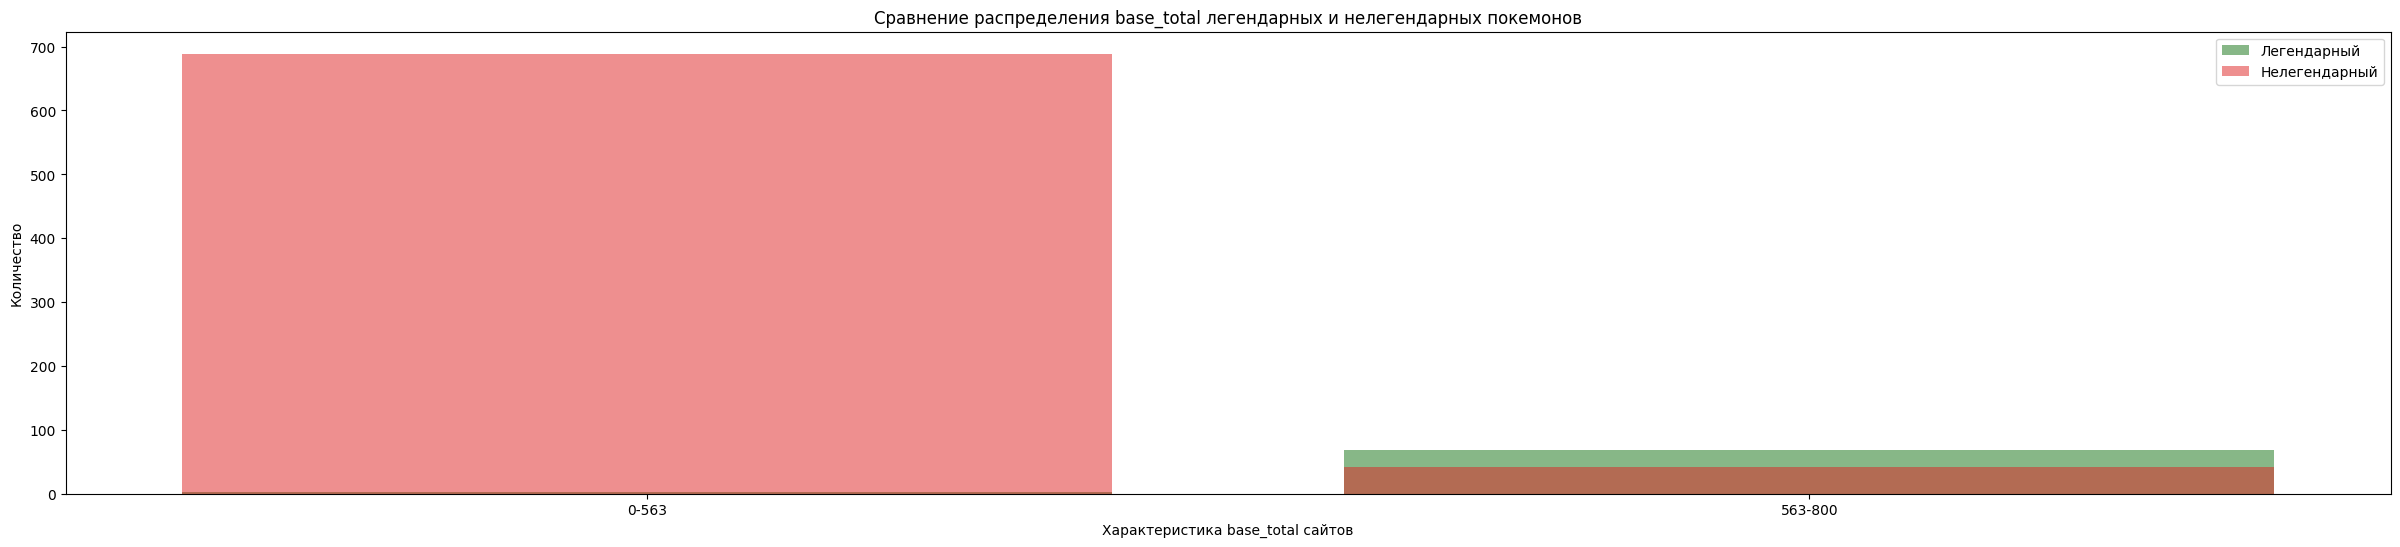

In [26]:
data['base_total'] = pd.cut(data['base_total'], bins=[0, 563, 800], labels=['0-563', '563-800'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'base_total')

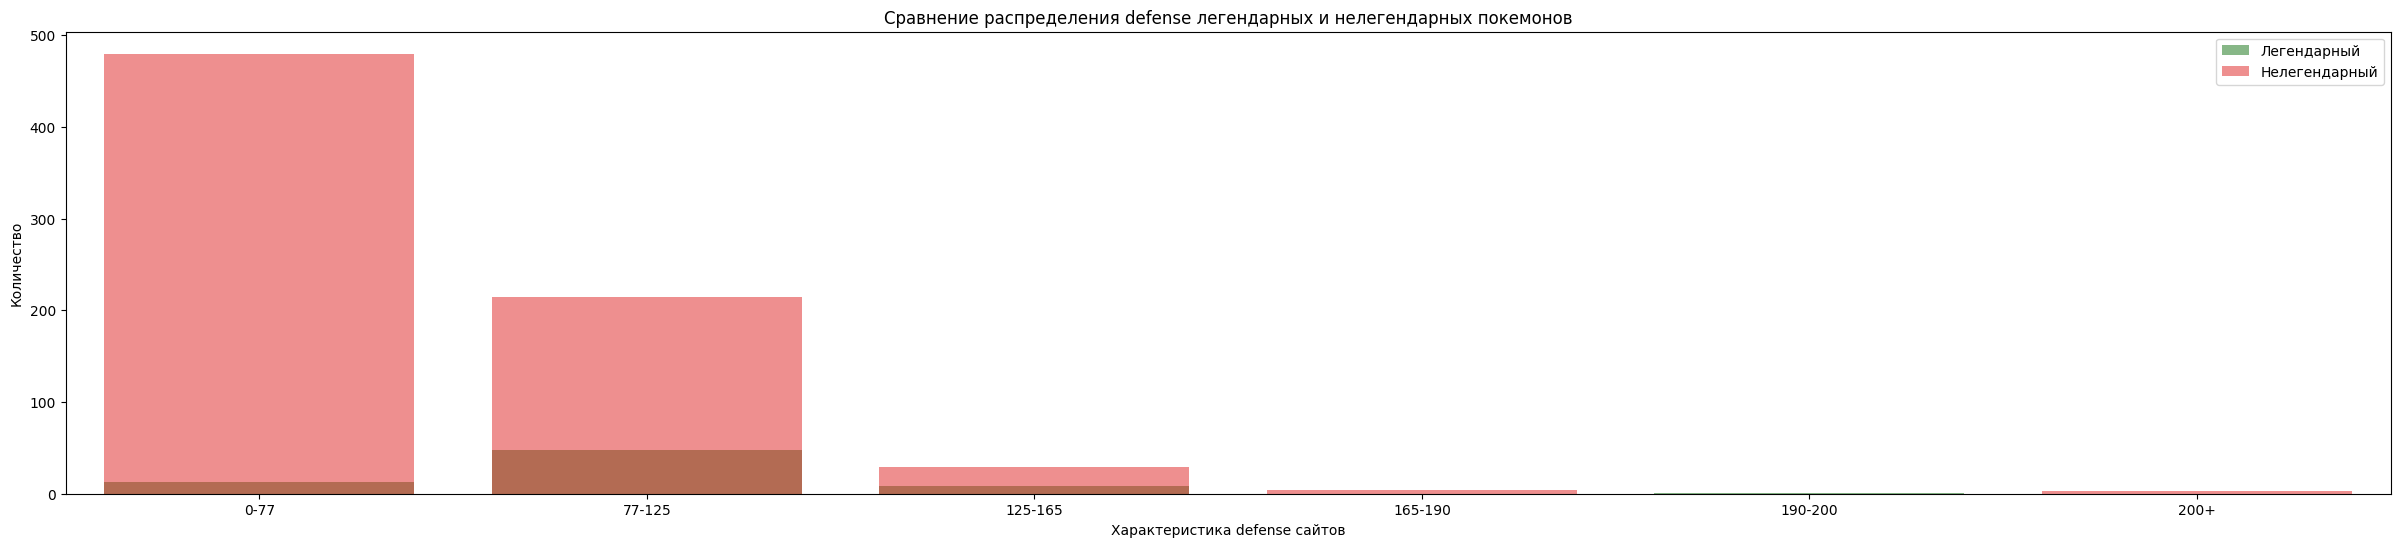

In [28]:
data['defense'] = pd.cut(data['defense'], bins=[0, 77, 125, 165, 190, 200, 250], labels=['0-77', '77-125', '125-165', '165-190', '190-200', '200+'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'defense')

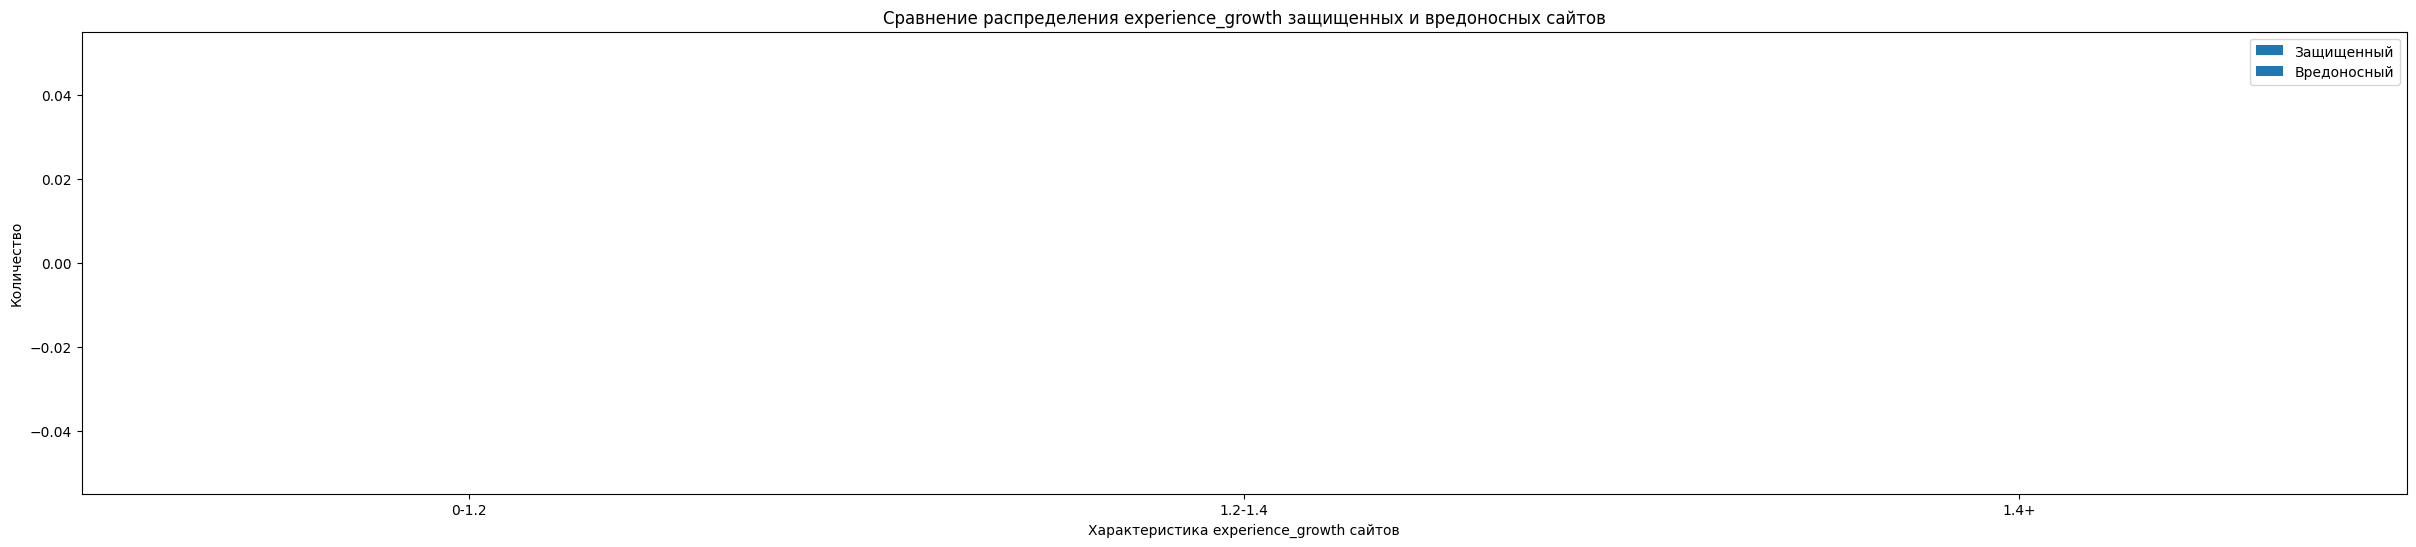

In [21]:
data['experience_growth'] = pd.cut(data['experience_growth'], bins=[0, 1.2, 1.4, 1.8], labels=['0-1.2', '1.2-1.4', '1.4+'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'experience_growth')

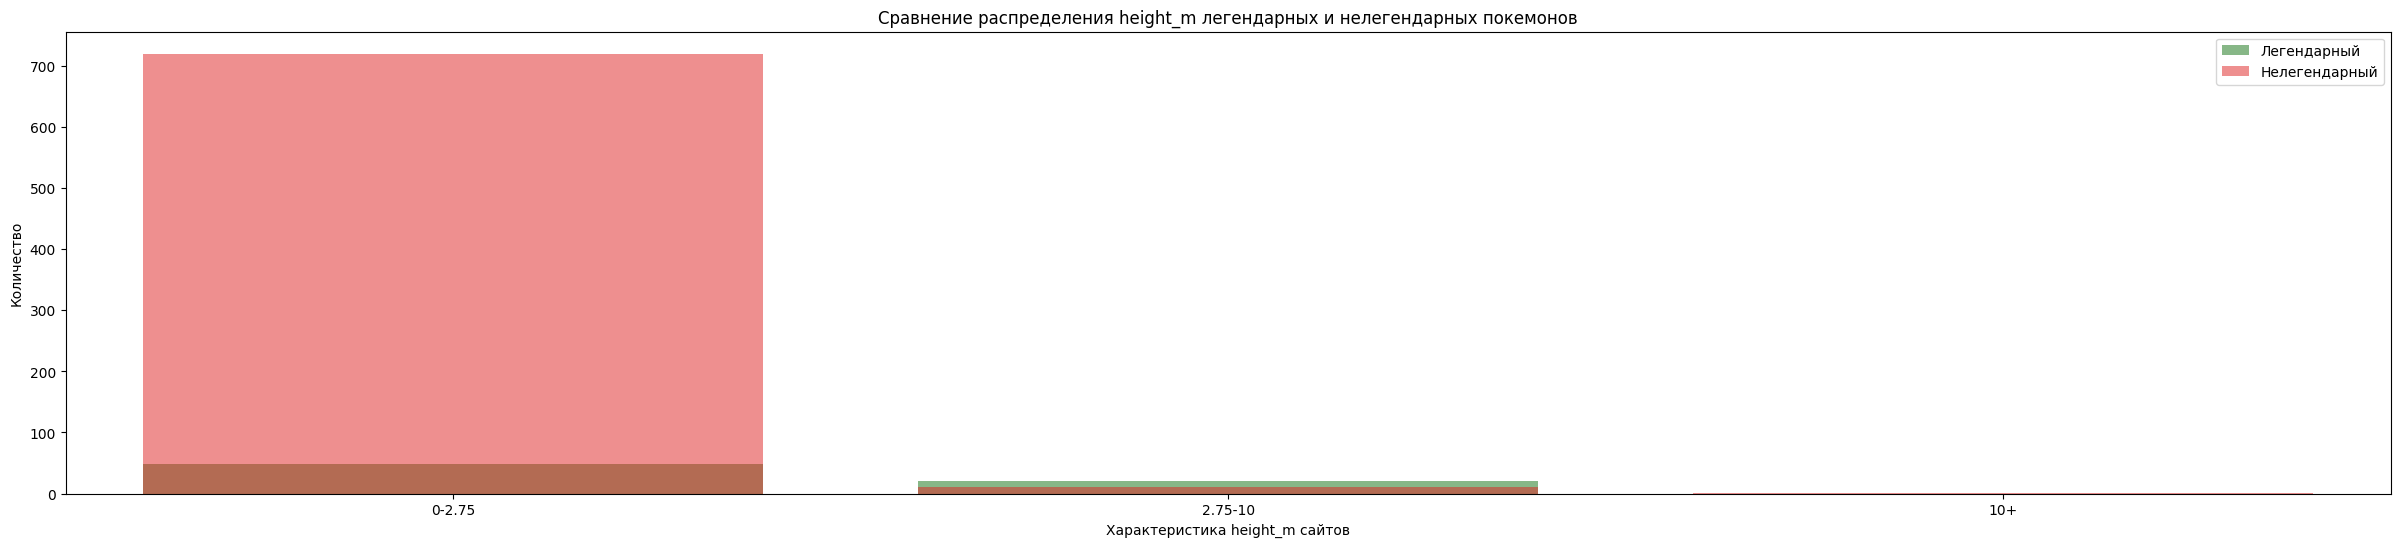

In [35]:
data['height_m'] = data.height_m.fillna(data.height_m.median())

data['height_m'] = pd.cut(data['height_m'], bins=[0, 2.75, 10, 16], labels=['0-2.75', '2.75-10', '10+'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'height_m')

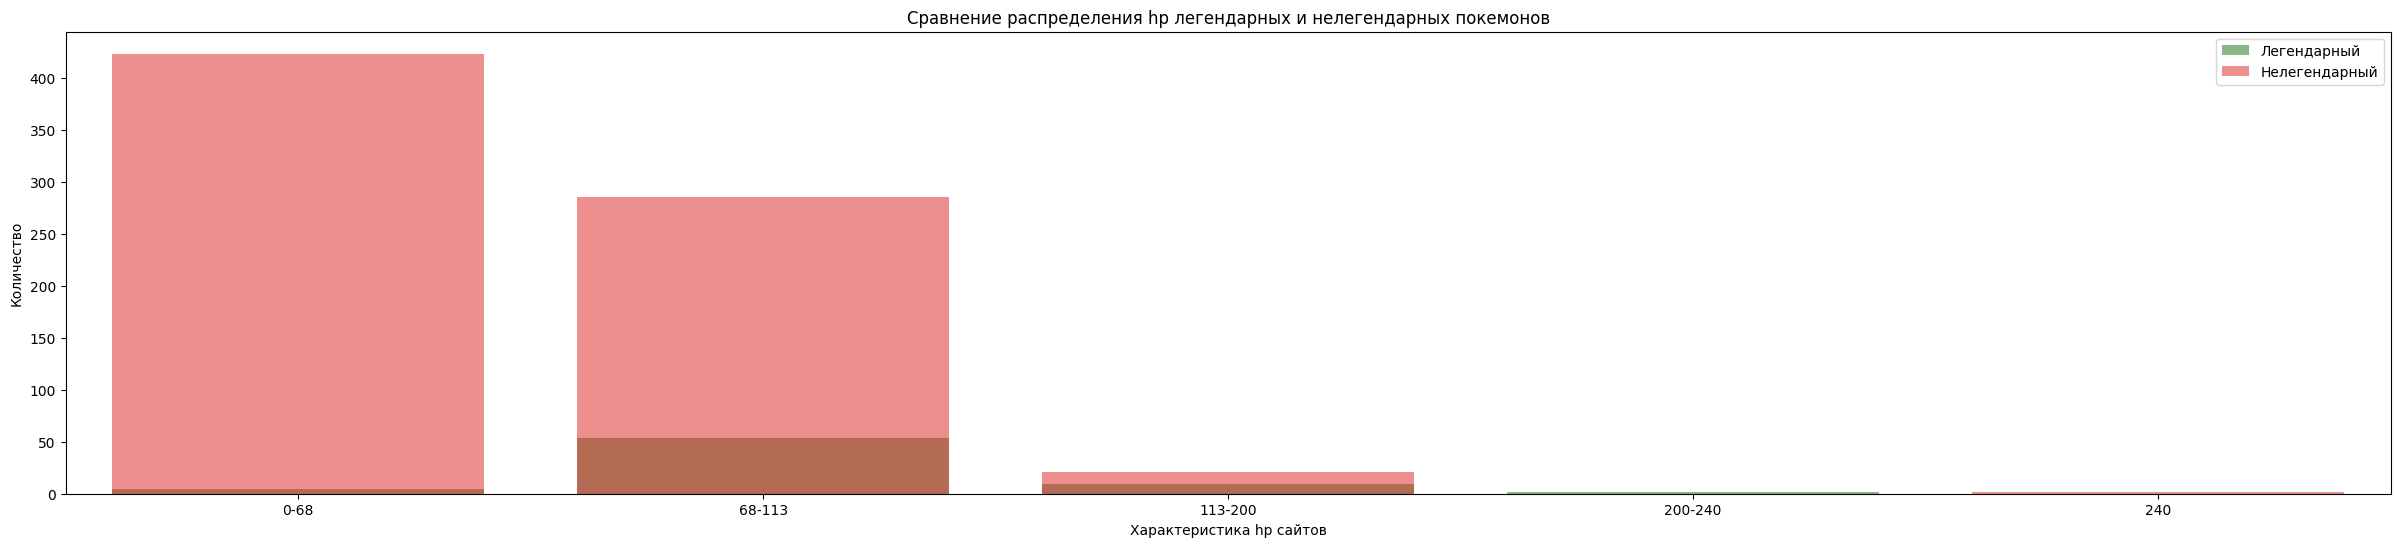

In [27]:
data['hp'] = pd.cut(data['hp'], bins=[0, 68, 113, 200, 240, 260], labels=['0-68', '68-113', '113-200', '200-240', '240'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'hp')

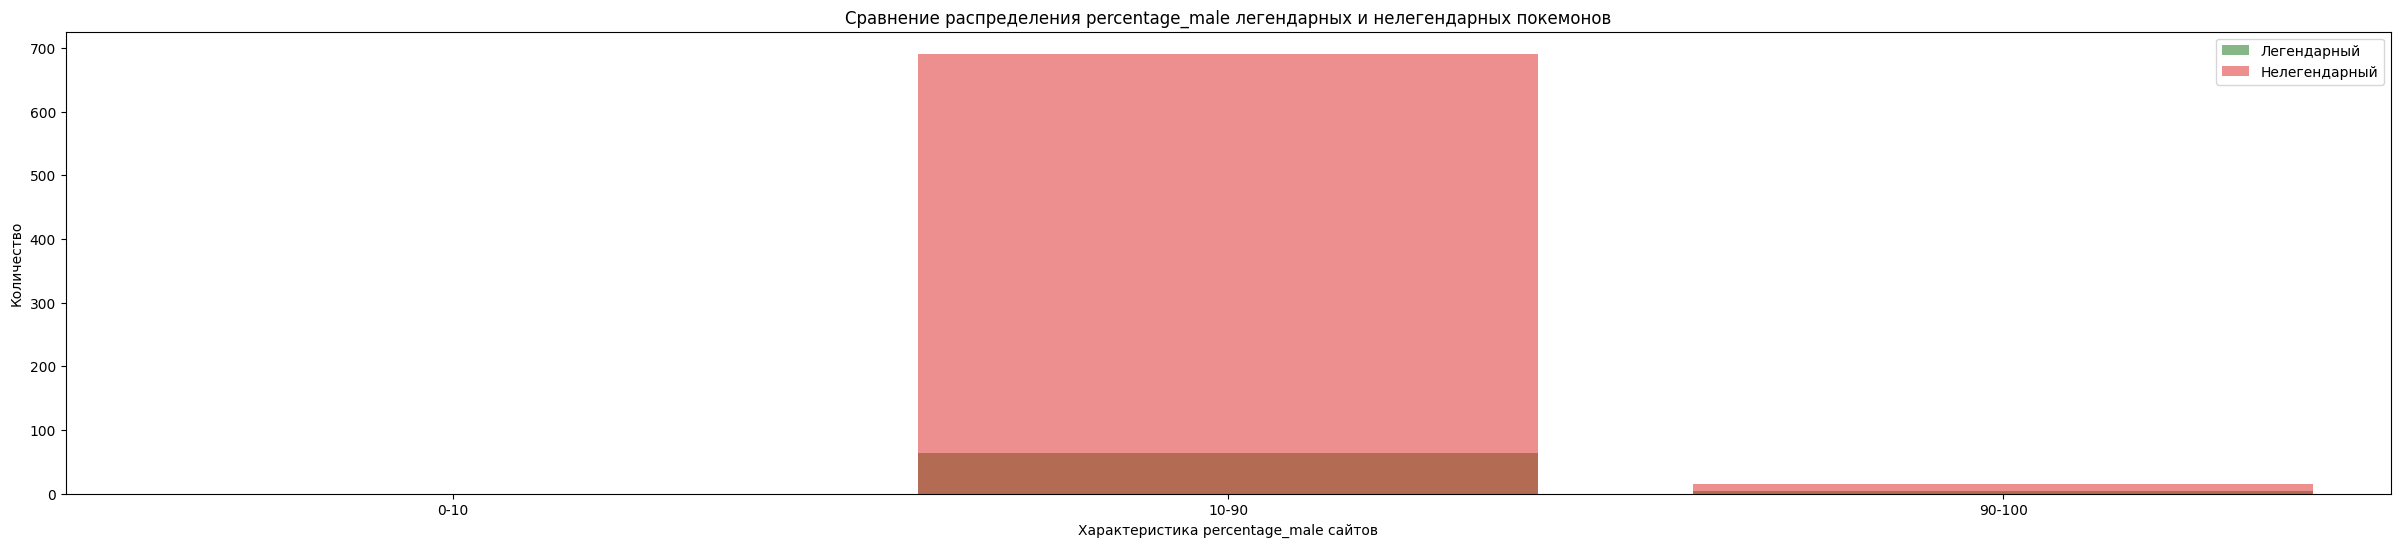

In [34]:
data['percentage_male'] = data.percentage_male.fillna(data.percentage_male.median())

data['percentage_male'] = pd.cut(data['percentage_male'], bins=[0, 10, 90, 100], labels=['0-10', '10-90', '90-100'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'percentage_male')

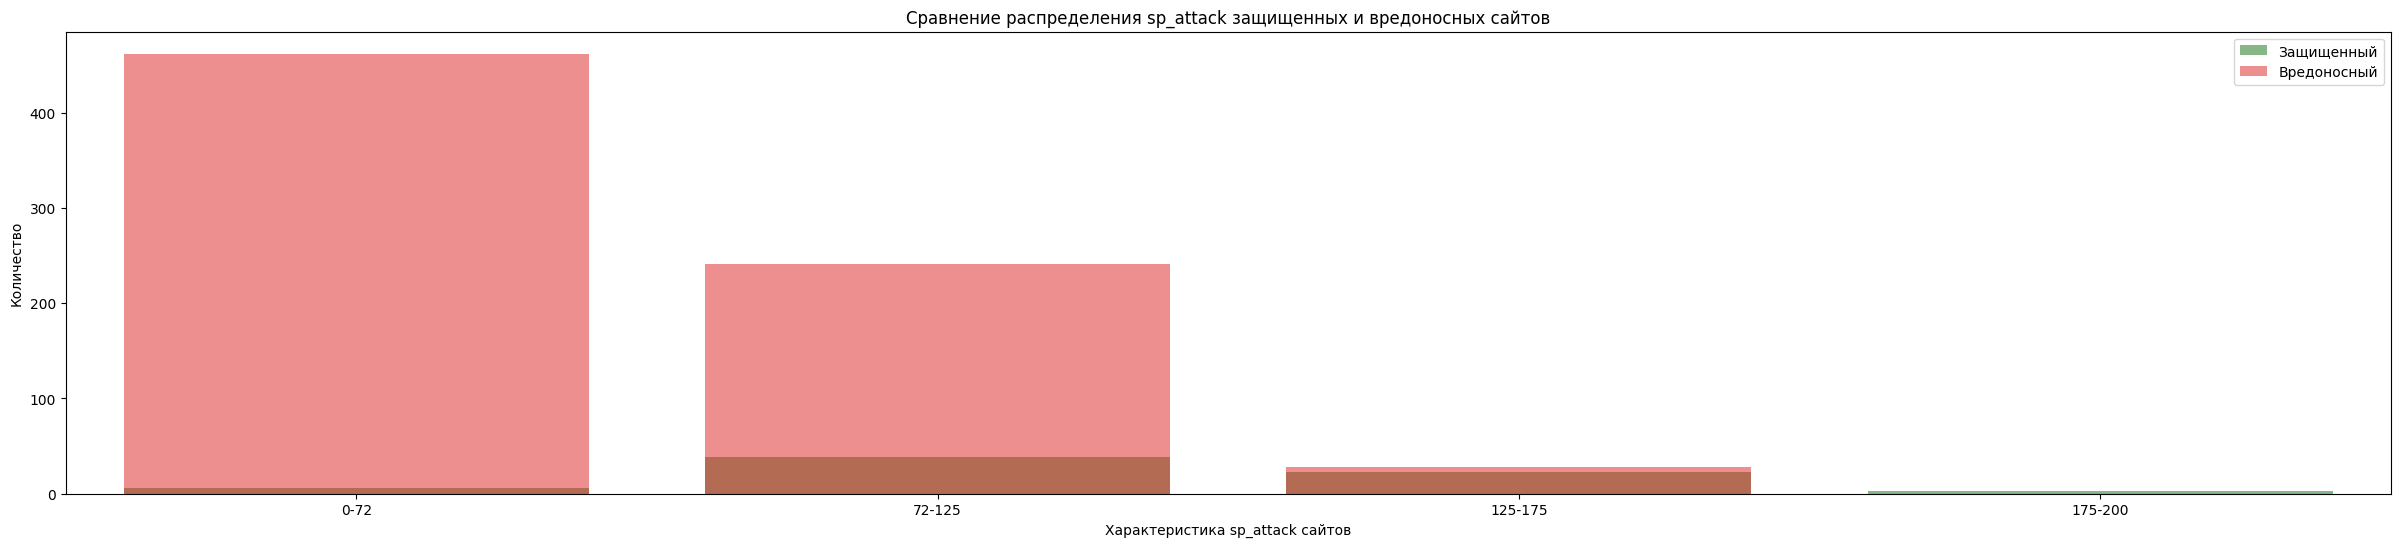

In [12]:
data['sp_attack'] = pd.cut(data['sp_attack'], bins=[0, 72, 125, 175, 200], labels=['0-72', '72-125', '125-175', '175-200'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'sp_attack')

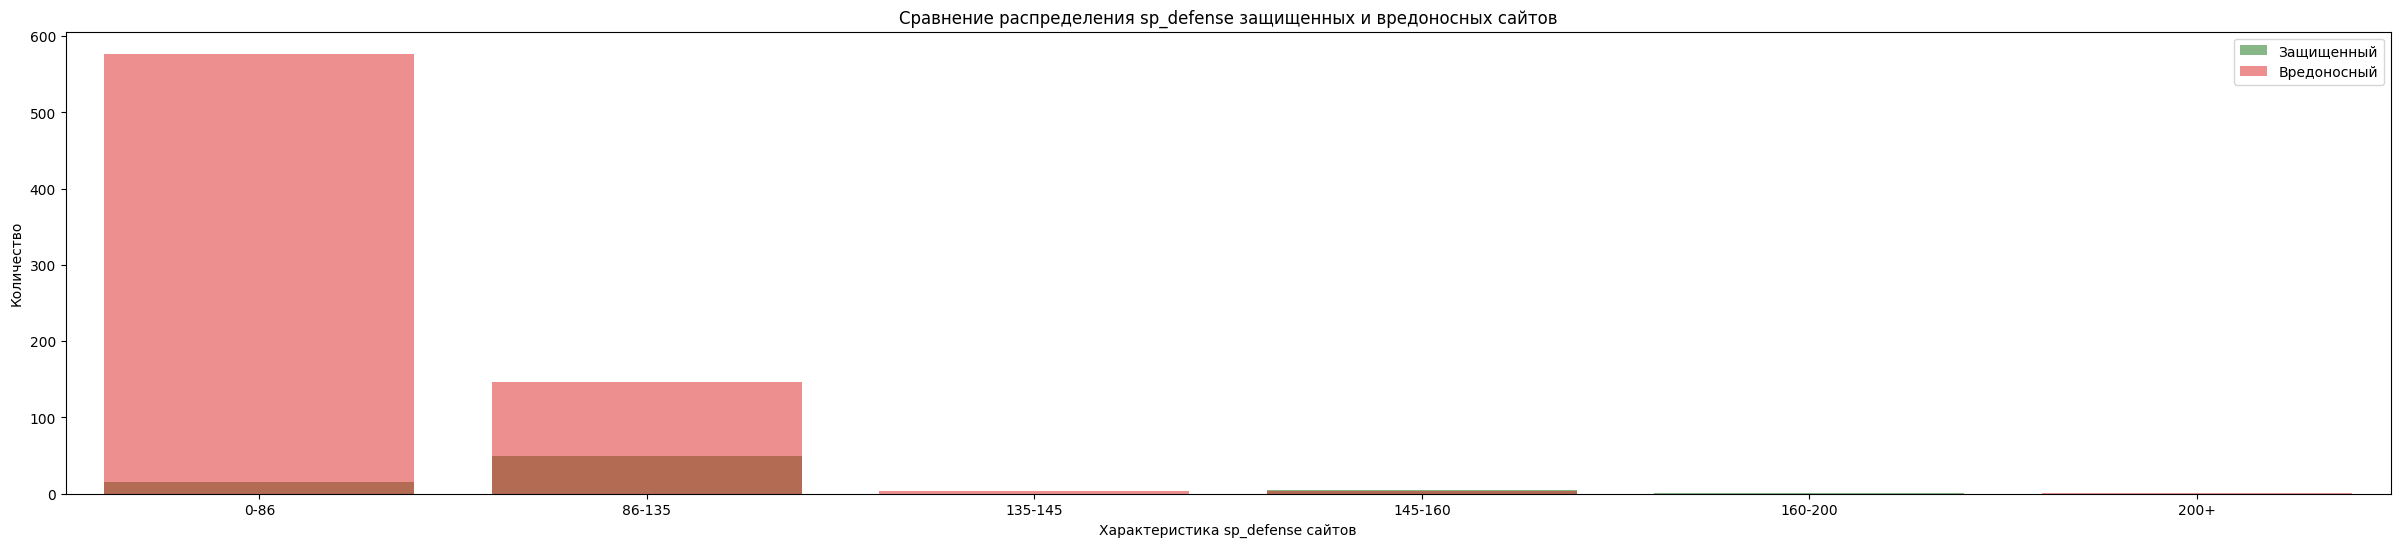

In [13]:
data['sp_defense'] = pd.cut(data['sp_defense'], bins=[0, 86, 135, 145, 160, 200, 250], labels=['0-86', '86-135', '135-145', '145-160', '160-200', '200+'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'sp_defense')

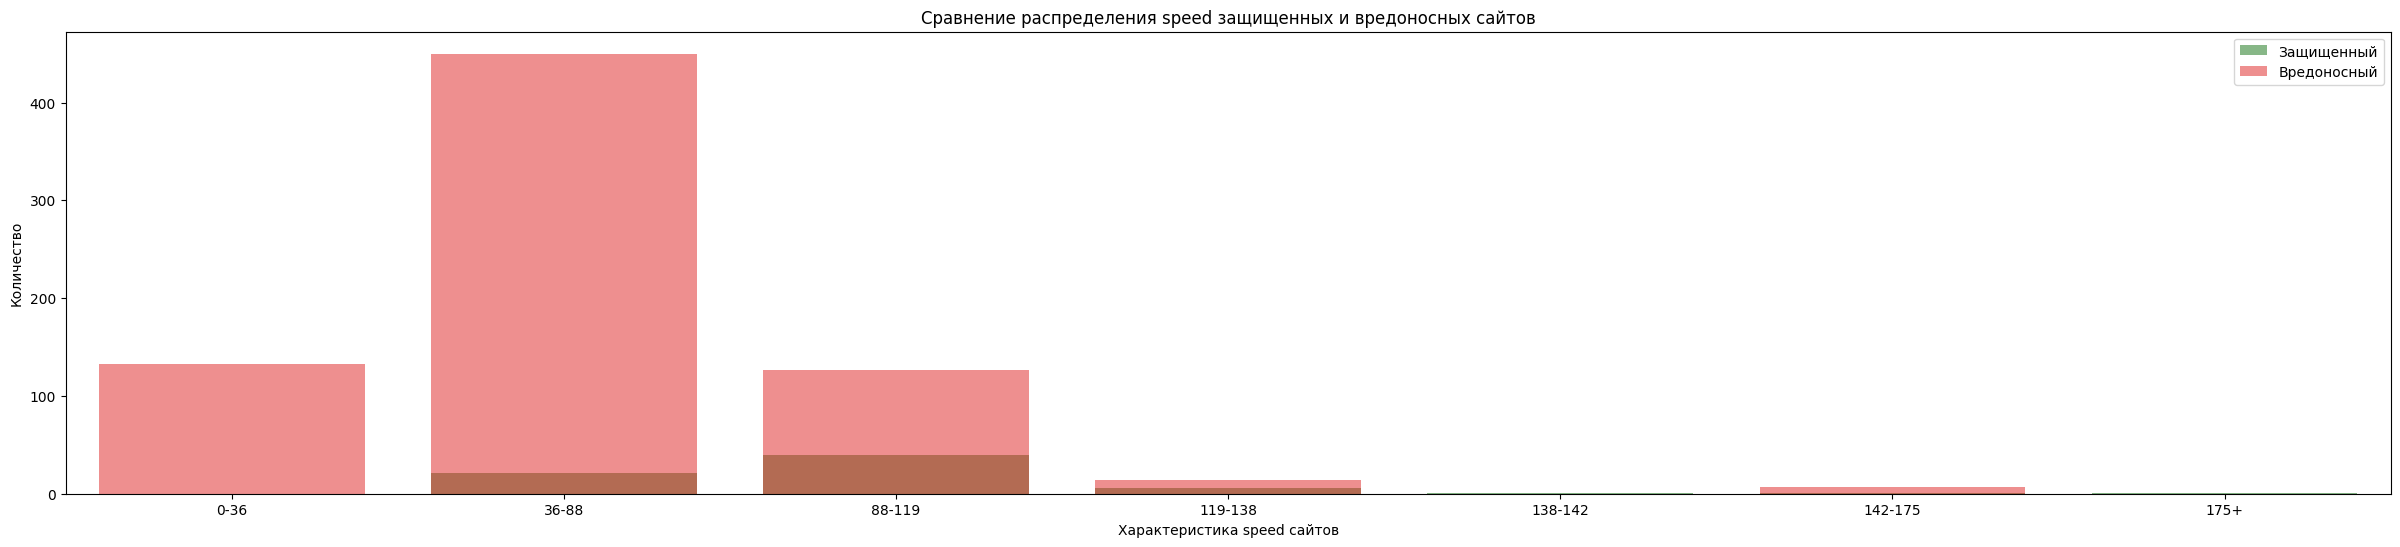

In [14]:
data['speed'] = pd.cut(data['speed'], bins=[0, 36, 88, 119, 138, 142, 175, 185], labels=['0-36', '36-88', '88-119', '119-138', '138-142', '142-175', '175+'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'speed')

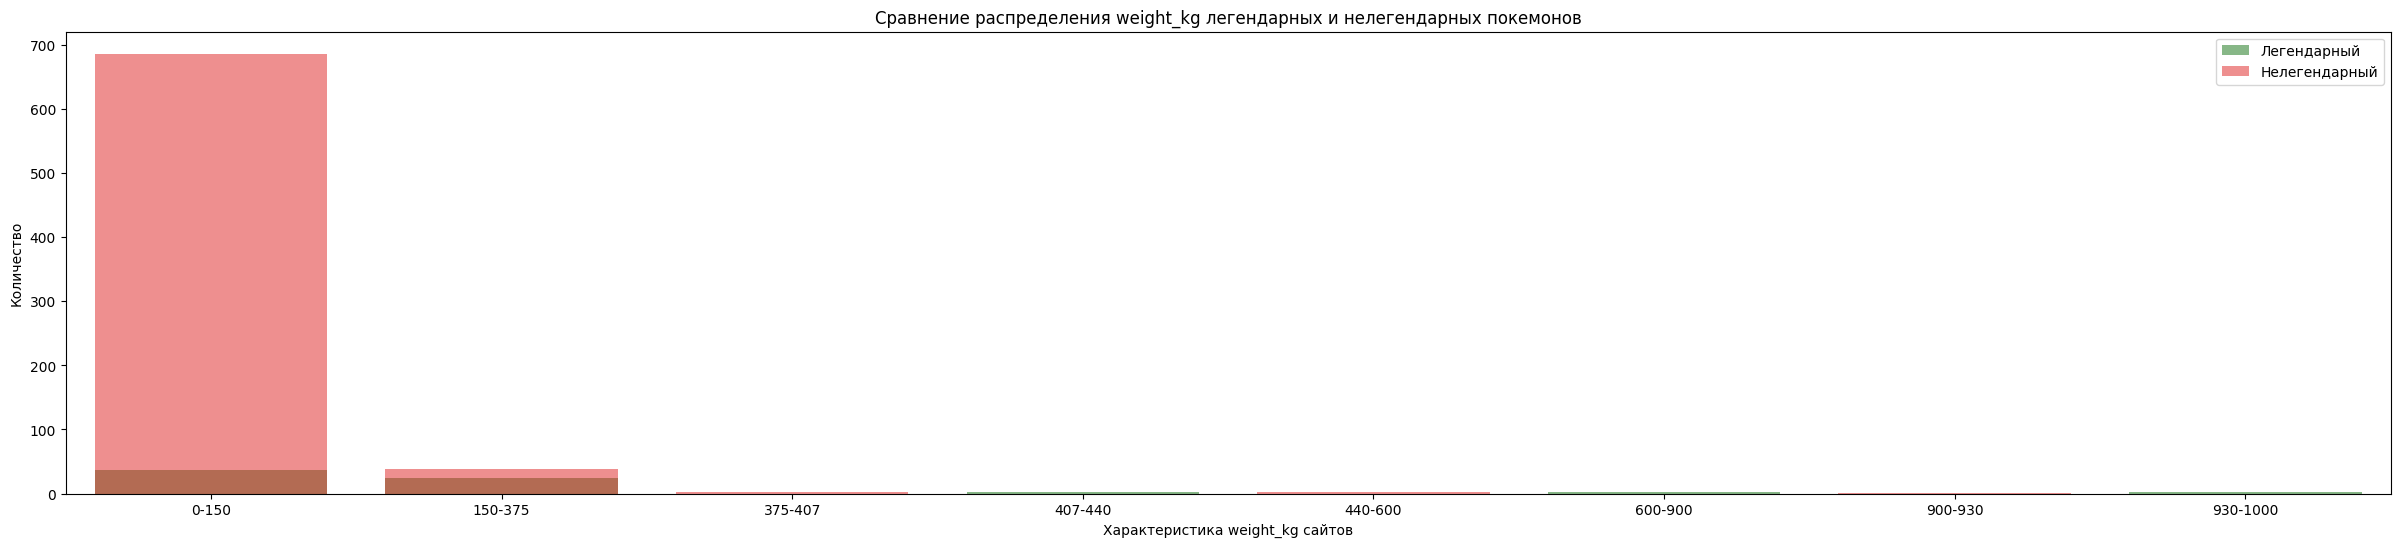

In [31]:
data['weight_kg'] = data.weight_kg.fillna(data.weight_kg.median())

data['weight_kg'] = pd.cut(data['weight_kg'], bins=[0, 150, 375, 407, 440, 600, 900, 930, 1000], labels=['0-150', '150-375', '375-407', '407-440', '440-600', '600-900', '900-930', '930-1000'])

legend_pokemons = data[data['is_legendary'] == 1]
no_legend_pokemons = data[data['is_legendary'] == 0]

number(data, legend_pokemons, no_legend_pokemons, 'weight_kg')